In [2]:
import matplotlib.pyplot as plt
import keras
keras.__version__

'2.1.1'

In [3]:
from keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

5

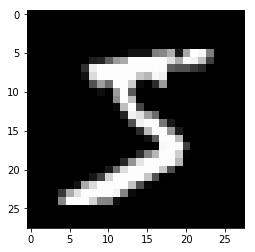

In [6]:
plt.imshow(train_images[0], cmap='gray')
train_labels[0]

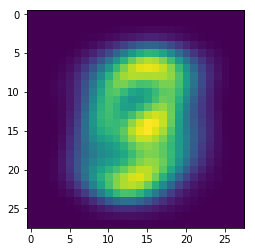

In [7]:
plt.imshow(train_images.mean(axis=0))

In [8]:
train_images = train_images.reshape(train_images.shape[0],28*28)
test_images = test_images.reshape(test_images.shape[0],28*28)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
train_images.shape

(60000, 784)

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [11]:
%%time

clf = SGDClassifier(loss='log')
clf.fit(train_images, train_labels)

/usr/lib/python3/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


CPU times: user 6.65 s, sys: 68.7 ms, total: 6.72 s
Wall time: 6.72 s


In [12]:
accuracy_score(train_labels, clf.predict(train_images))

0.90511666666666668

In [13]:
accuracy_score(test_labels, clf.predict(test_images))

0.90080000000000005

In [14]:
from keras import models
from keras import layers

In [15]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [17]:
from keras.utils import to_categorical

In [18]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
train_labels[:5,:]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [20]:
%%time

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.2539 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.1042 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0685 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0500 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0377 - acc: 0.9884
CPU times: user 45.3 s, sys: 236 ms, total: 45.6 s
Wall time: 45.3 s


In [21]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 60us/step


[0.070526301494624938, 0.97960000000000003]